# Multi Linear Regression Bike Sharing Assignment

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

## Business Goal

Build a model to determine the independent variables which are responsible for increases in the demand for shared bikes. They can accordingly change the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Read the csv file using pandas
bikesharing = pd.read_csv("day.csv")

In [3]:
# Display all columns 
pd.set_option('display.max_columns', None)

#check the head of the bikesharing dataset
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bikesharing dataframe

In [4]:
# check the shape of the bikesharing data frame
bikesharing.shape

(730, 16)

In [5]:
# Check info of the dataframe to know the data types and if any null values exists in each column
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- There are no null values in any of the columns.

In [6]:
#check the details of numerical data
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Cleaning Data

- Dropping 'instant' column as it is just an index number.
- Dropping 'dteday' as there are columns already exists which provide the same information like yr,mnth and weekday.
- Dropping 'casual' and 'registered' columns as we have 'cnt' column which is sum of the both columns that is the target column.

In [7]:
bikesharing.drop(['instant','dteday','casual','registered'],axis = 1, inplace = True)

In [8]:
#Check dataframe for null and datatype after dropping columns
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [9]:
bikesharing.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [10]:
bikesharing.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [11]:
bikesharing.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [12]:
bikesharing.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [13]:
bikesharing.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [14]:
# Check the correlation of all the coulumns
bikesharing.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


## 2.2 Handling Outliers

In [15]:
#check all the columns in the bikesharing data set
bikesharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [16]:
#check no. of unique values in all columns
bikesharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

Observations
- Categorical variables : season , mnth , weekday , weathersit
- Binary variables      : yr , holiday , workingday
- Numerical varibales   : temp , atemp , hum , windspeed(independent variables) and  cnt(target variable)

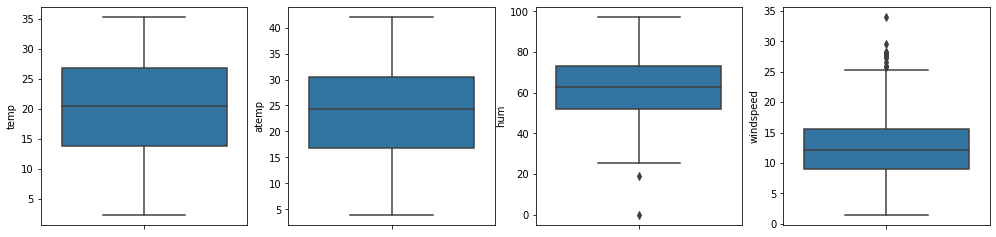

In [17]:
# Draw box plot for independent variables with continous numerical variables
Numerical_columns = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(17,4))

i = 1
for columns in Numerical_columns:
    plt.subplot(1,4,i)
    sns.boxplot(y=columns, data=bikesharing)
    i+=1

- there are no outliers present in the numerical variables

## 3. EDA
### 3.1 Handling the categorical variables i.e. convert season , mnth , weekday and weathersit to categorical  variables

In [18]:
bikesharing.season.replace({1:"spring",2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikesharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

bikesharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)

bikesharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

In [19]:
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


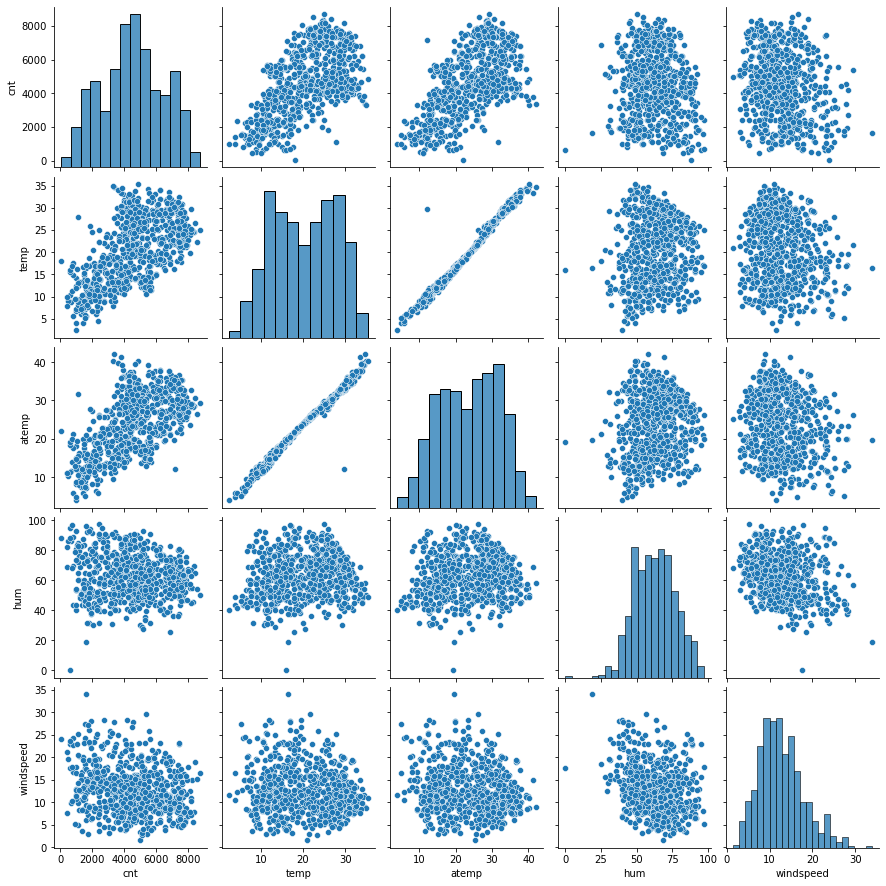

In [20]:
# Pair plot for continous Numeric variables i.e temp , atemp , hum, windspeed , cnt
sns.pairplot(bikesharing[['cnt','temp','atemp','hum','windspeed']])
plt.show()

- there is high correlation between temp and atemp with each other
- there is good correlation between temp and target variable - cnt.
- there is good correlation between atemp and target variable -  cnt.

<Figure size 1440x1080 with 0 Axes>

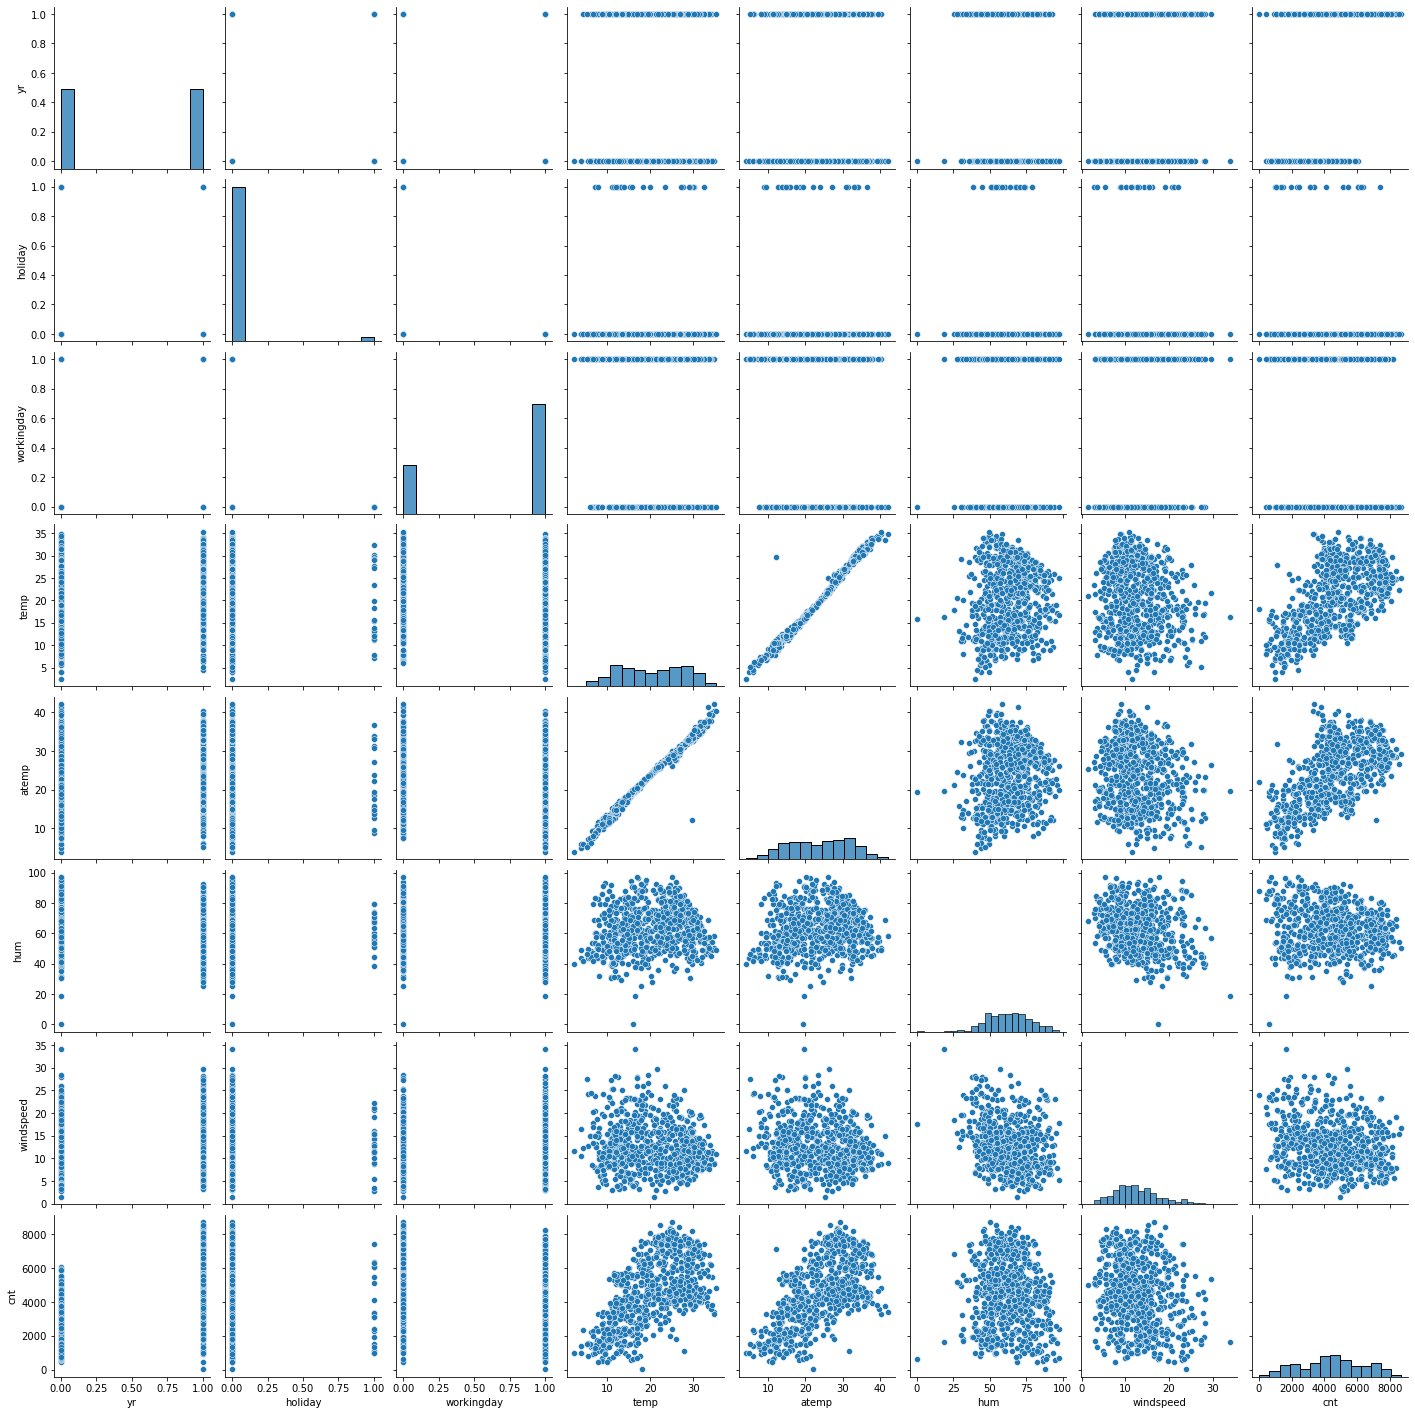

In [21]:
# Pair plot for all numeric variables
plt.figure(figsize=(20,15))
sns.pairplot(bikesharing)
plt.show()

<AxesSubplot:>

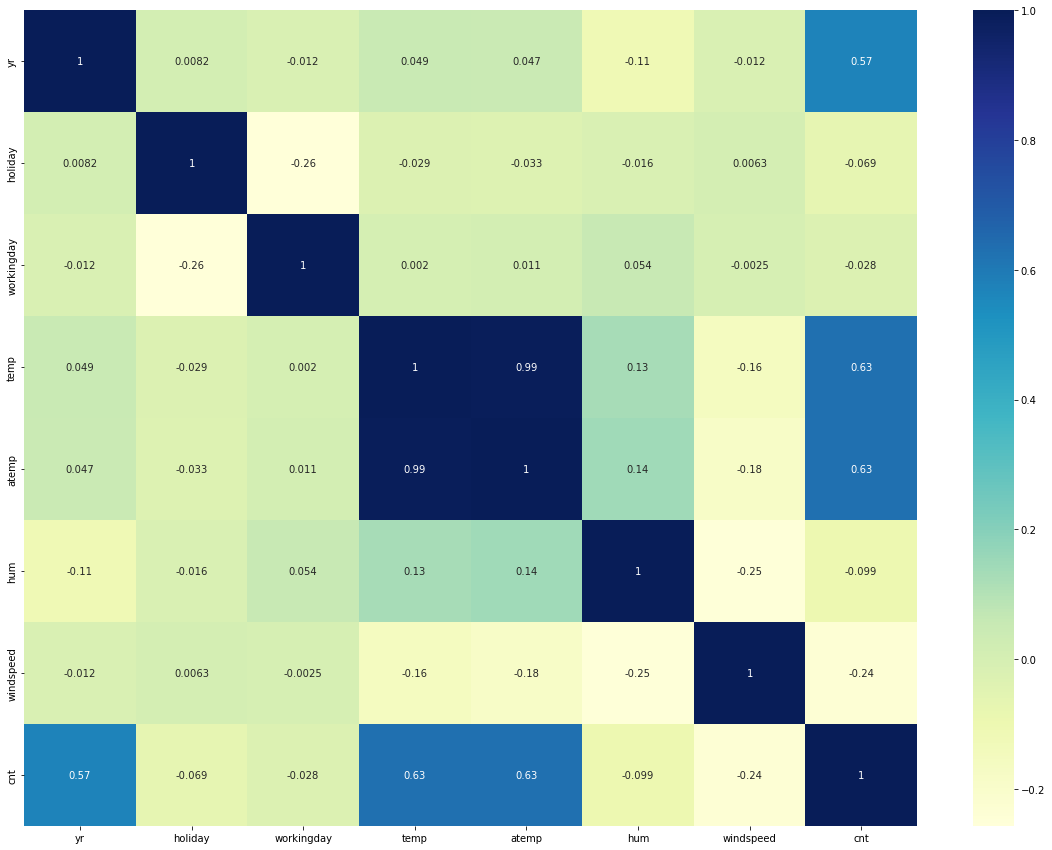

In [22]:
# Draw Heatmap of correlation
plt.figure(figsize=(20,15))
sns.heatmap(bikesharing.corr(),annot = True,cmap="YlGnBu")

- There is high correlation between temp and atemp variables. only variable can be consider for the model. Based on the Variance Inflation Factor(VIF) one of 2 variables can be eliminated during model building.
- Also target variable has a linear relationship with temp and atemp variable(independent variables) which is the good indication  for building a linear regression Model.

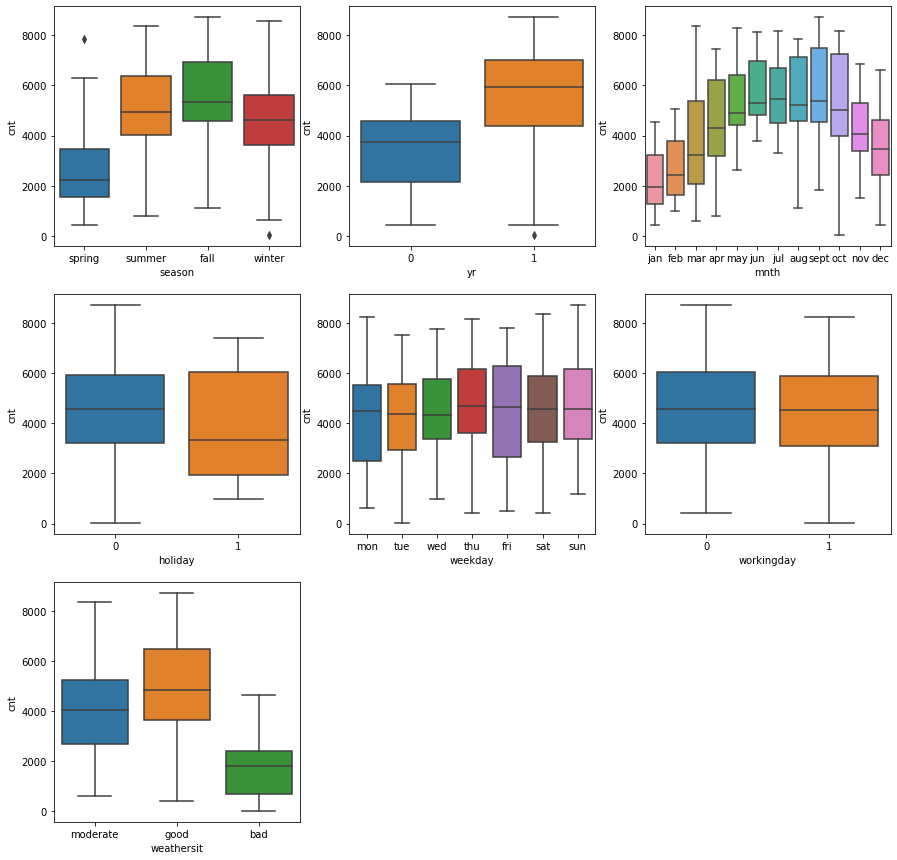

In [23]:
# Boxplot for categorical variables and target variable cnt to see demand
vars_category = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_category):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikesharing, x=i[1], y='cnt')
plt.show()

From the above box plots many insights can be drawn:
1. Season 3 i.e fall has highest demand for rental bikes
2. Demand for 2019 year has been increased.
3. Demand is continously increasing each month till June. September month has highest demand. After September mmonth the demand decreased.
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathershit has highest demand
7. During September the bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

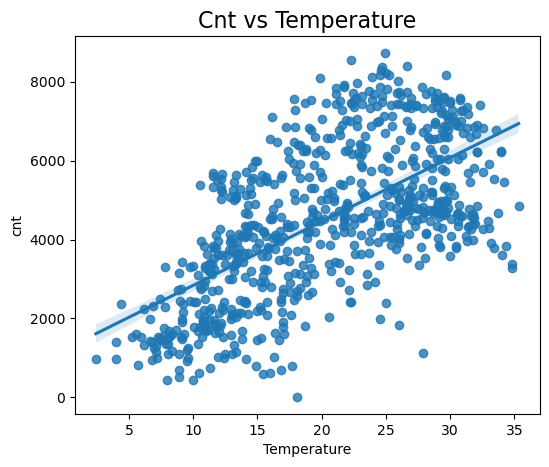

In [24]:
# Regplot between cnt and temperature
plt.figure(figsize=(6,5),dpi=100)
plt.title("Cnt vs Temperature",fontsize=16)
sns.regplot(data=bikesharing,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

- There is an increase in the cnt as there is increase in temperature. 
- so cnt and temperature are linearly correlated.

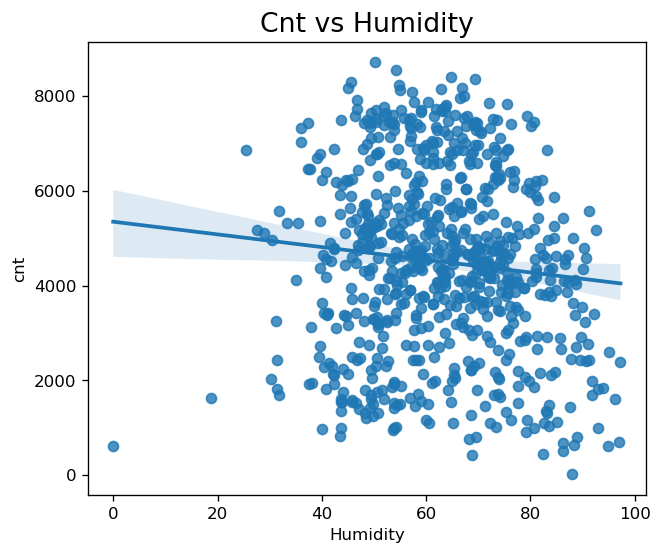

In [25]:
# Regplot between cnt and Humidity
plt.figure(figsize=(6,5),dpi=120)
plt.title("Cnt vs Humidity",fontsize=16)
sns.regplot(data=bikesharing,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

There is an decrease in the cnt as there is an increase in humidity and humidity is more scattered

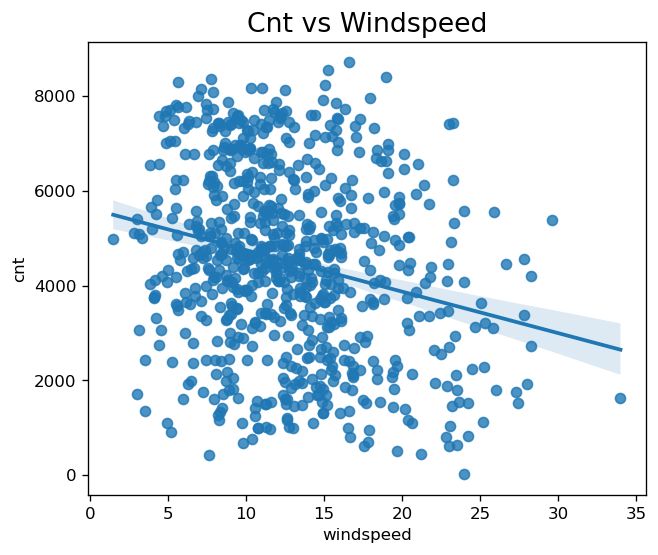

In [26]:
# Regplot between cnt and Windspeed
plt.figure(figsize=(6,5),dpi=120)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikesharing,y="cnt",x="windspeed")
plt.xlabel("windspeed")
plt.show()

There is an decrease in the cnt as there is an increase in windspeed and windspeed is more scattered

## Step 4 : Data Preparation

In [27]:
#Create Dummy variables for all categorical variables
bikesharing = pd.get_dummies(data=bikesharing,columns=["season","mnth","weekday"],drop_first=True)
bikesharing = pd.get_dummies(data=bikesharing,columns=["weathersit"])

- Dropping the first columns for season,mnthweekday as (p-1) dummies can explain p categories.
- For weathersit first column is not dropped so as to not loose the information about severe weather conditions.

In [28]:
bikesharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [29]:
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [30]:
#Check shape before split of data into train and test
bikesharing.shape

(730, 31)

In [31]:
# y will have target variable i.e cnt
y=bikesharing.pop('cnt')

# X will have all other independent variables
X = bikesharing

# Split the data into train and test in the ratio 70:30
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [33]:
X_train.shape

(511, 30)

In [34]:
X_test.shape

(219, 30)

In [35]:
# Scale continuous Numerical variables
num_vars = ['temp','atemp','hum','windspeed']

#Normalized scaler
scaler = MinMaxScaler()

#Fit and transform training set only as we are using the test set as future data
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [36]:
#Inspect stats from training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,0.074364,0.074364,0.074364,0.088063,0.091977,0.084149,0.062622,0.091977,0.091977,0.09002,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,0.262619,0.262619,0.262619,0.283664,0.289276,0.277883,0.242520,0.289276,0.289276,0.28649,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


## 5.Build Model

### 5.1 Build a Model using RFE and Automated approach

In [38]:
# Build a Lienar Regression model using SKLearn for Recursive feature elimination
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [40]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 16),
 ('workingday', True, 1),
 ('temp', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('mnth_aug', False, 14),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 13),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', False, 3),
 ('mnth_may', False, 4),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 5),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 7),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 8),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 6)]

### 5.2 Manual Elimination

In [41]:
# Function to build model using statsmodel api
def build_statsmodel(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [42]:
#Function to calculate VIFs
def find_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [43]:
#Print Columns selected by RFE. Manual elimination can start with these columns.
X_train.columns[rfe.support_]

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [44]:
#Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'temp', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [45]:
# Taking 15 columns supported by RFE for regression
# replacing atemp with temp . atemp as atemp and temp are highly correlated with each other and temp is an measured value
X_train_rfe = X_train[['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good']]

In [46]:
X_train_rfe.shape

(511, 15)

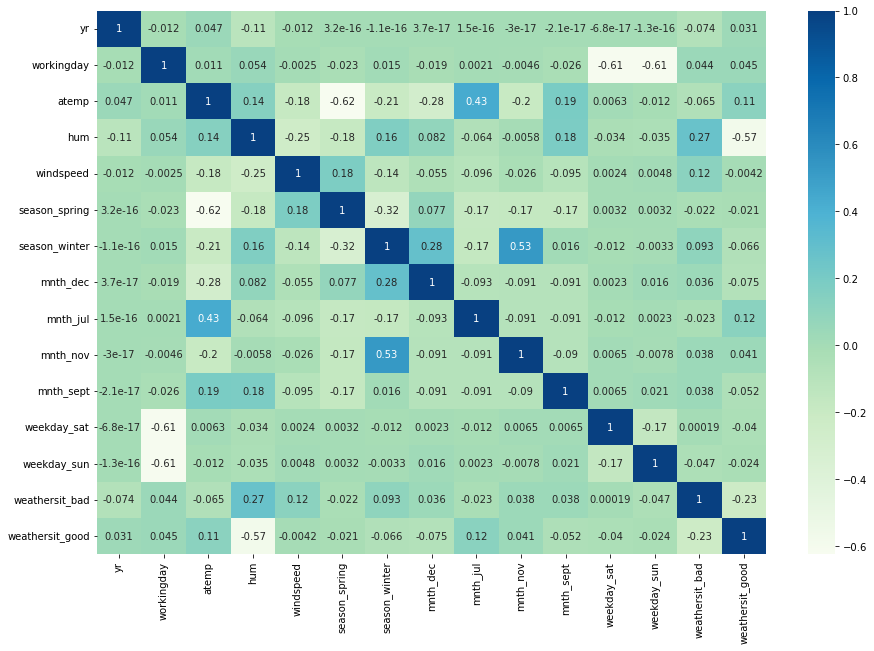

In [47]:
# Correlation of features selected by RFE with target column
plt.figure(figsize = (15,10))
sns.heatmap(bikesharing[['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good']].corr(), cmap='GnBu', annot=True)
plt.show()

### 5.3 starting to build the model with 15 variables which are selected in RFE

## Model 1

In [48]:
# All columns selected by RFE are selected to build first model.
independent_cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good']
build_statsmodel(independent_cols)
find_vif(independent_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.4
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          6.57e-185
Time:                        19:36:42   Log-Likelihood:                -4126.7
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     495   BIC:                             8353.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2190.9975    405.833     

## Model 2

In [49]:
# Remove humitidy as it is having high VIF and has negative coefficent.
independent_cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good']
build_statsmodel(independent_cols)
find_vif(independent_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.3
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          9.77e-183
Time:                        19:36:42   Log-Likelihood:                -4134.6
No. Observations:                 511   AIC:                             8299.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1212.2594    325.675     

## Model 3

In [50]:
## remove 'workingday' as it is having high VIF.
independent_cols = ['yr', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good']
build_statsmodel(independent_cols)
find_vif(independent_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.3
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          2.03e-182
Time:                        19:36:42   Log-Likelihood:                -4138.1
No. Observations:                 511   AIC:                             8304.
Df Residuals:                     497   BIC:                             8364.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1799.1980    237.090     

## Model 4

In [51]:
# Removing windspeed as it is having high VIF value and has negative coefficent.
independent_cols = ['yr', 'temp', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good']
build_statsmodel(independent_cols)
find_vif(independent_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.8
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          3.24e-180
Time:                        19:36:43   Log-Likelihood:                -4146.1
No. Observations:                 511   AIC:                             8318.
Df Residuals:                     498   BIC:                             8373.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1338.3428    209.822     

## Model 5

In [52]:
# Remove 'weathersit_bad' as it has negative coeffient
independent_cols = ['yr', 'temp', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_good']
build_statsmodel(independent_cols)
find_vif(independent_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          1.37e-170
Time:                        19:36:43   Log-Likelihood:                -4171.7
No. Observations:                 511   AIC:                             8367.
Df Residuals:                     499   BIC:                             8418.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1092.7425    217.474     

## Model 6

In [53]:
# Remove 'weekday_sat'  
independent_cols = ['yr', 'temp', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'mnth_sept',
       'weekday_sun', 'weathersit_good']
build_statsmodel(independent_cols)
find_vif(independent_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     207.5
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          8.36e-171
Time:                        19:36:43   Log-Likelihood:                -4173.9
No. Observations:                 511   AIC:                             8370.
Df Residuals:                     500   BIC:                             8416.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1114.4238    217.974     

## Model 7

In [54]:
#remove mnth_nov as it has negative coeffient
independent_cols = ['yr', 'temp', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_sept',
       'weekday_sun', 'weathersit_good']
build_statsmodel(independent_cols)
find_vif(independent_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     223.0
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          6.26e-169
Time:                        19:36:43   Log-Likelihood:                -4181.2
No. Observations:                 511   AIC:                             8382.
Df Residuals:                     501   BIC:                             8425.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             919.6100    214.626     

## Model 8

In [55]:
#remove mnth_dec as it has negative coeffient
independent_cols = ['yr', 'temp', 'season_spring',
       'season_winter', 'mnth_jul', 'mnth_sept',
       'weekday_sun', 'weathersit_good']
build_statsmodel(independent_cols)
find_vif(independent_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     247.6
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          7.94e-169
Time:                        19:36:43   Log-Likelihood:                -4184.3
No. Observations:                 511   AIC:                             8387.
Df Residuals:                     502   BIC:                             8425.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             844.7481    213.557     

## Model 9

In [56]:
#remove weekday_sun as it has high p-value
independent_cols = ['yr', 'temp', 'season_spring',
       'season_winter', 'mnth_jul', 'mnth_sept',
       'weathersit_good']
build_statsmodel(independent_cols)
find_vif(independent_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     281.0
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          2.66e-169
Time:                        19:36:44   Log-Likelihood:                -4186.1
No. Observations:                 511   AIC:                             8388.
Df Residuals:                     503   BIC:                             8422.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             875.7366    213.459     

Here VIFs are almost in acceptable range and p-value for all the features is almost equal to 0.0 and R-squared is 0.796. Model 9 can be conisdered as the final model as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi collinear variables (high VIF). Difference between R-squared and Adjusted R-squared values for this model is very less, which also means that there are no additional parameters that can be removed from this model.

In [57]:
#Build a model with all columns to select features automatically
def build_sk_model(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [58]:
#Let us build the final model using sklearn
cols = ['yr', 'temp', 'season_spring',
       'season_winter', 'mnth_jul', 'mnth_sept',
        'weathersit_good']
#Build a model with above columns
lr = build_sk_model(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

875.7365974141712 [ 2036.59941464  4137.5976013  -1136.66593135   486.46331393
  -569.08215248   462.71605072   783.4555084 ]


## Step 6 : Model Evaluation
### Residual Analysis

In [59]:
y_train_pred = lr.predict(X_train[cols])

In [60]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

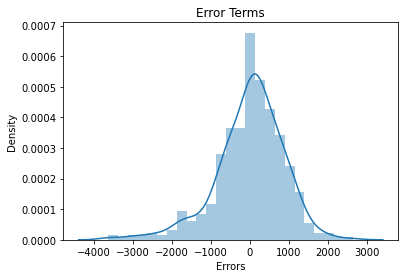

In [61]:
plot_res_dist(y_train,y_train_pred)

Errors are normally distribured with mean 0.

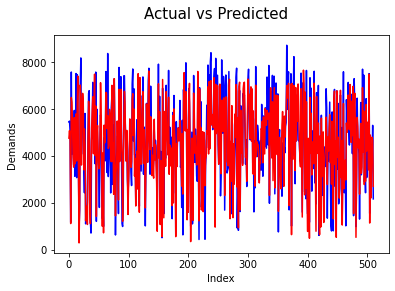

In [62]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result following almost the same pattern so this model looks good

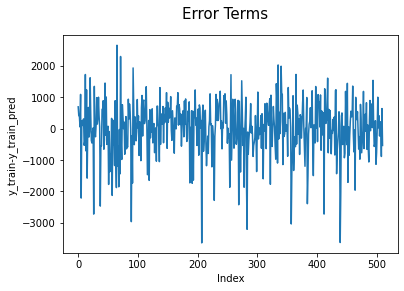

In [63]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Here,If we see the error terms are independent of each other.


In [64]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7963526850053904

R-Sqaure is almost same as obtained from final model

## Linerarity check

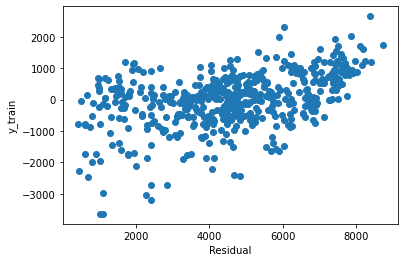

In [65]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

## Predict values for test data set

In [66]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [67]:
#Columns from our final model
cols = ['yr', 'temp', 'season_spring',
       'season_winter', 'mnth_jul', 'mnth_sept',
        'weathersit_good']
#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

## R-Squared value for test predictions

In [68]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.7762360464028407

## Homoscedacity

R2 value for predictions on test data (0.796) is almost same as R2 value of train data(0.776). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

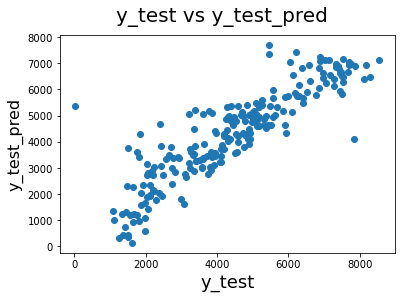

In [69]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)         
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_test_pred', fontsize = 16)

variance of the residuals (error terms) is constant across all predictions. i.e error term does not vary much as the value of the predictor variable changes.

## Plot Test vs Predicted test values

In [70]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)             
    plt.xlabel('Index', fontsize=18)                              
    plt.ylabel('Counts', fontsize=16)

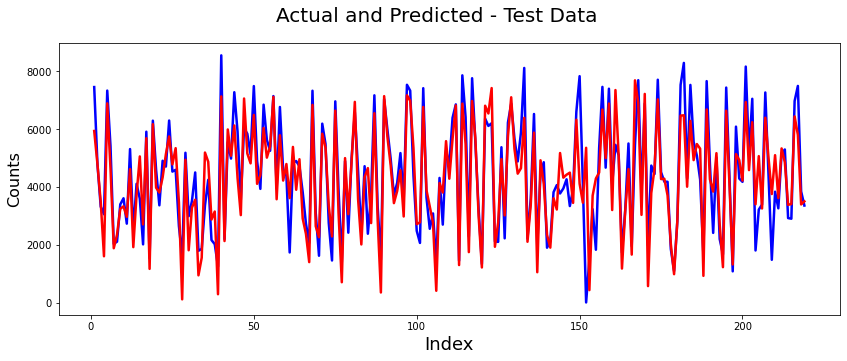

In [71]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

As we can see predictions for test data is very close to actuals

## Plot Error Terms for test data

In [72]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)             
    plt.xlabel('Index', fontsize=18)                      
    plt.ylabel('Counts - Predicted Counts', fontsize=16)               

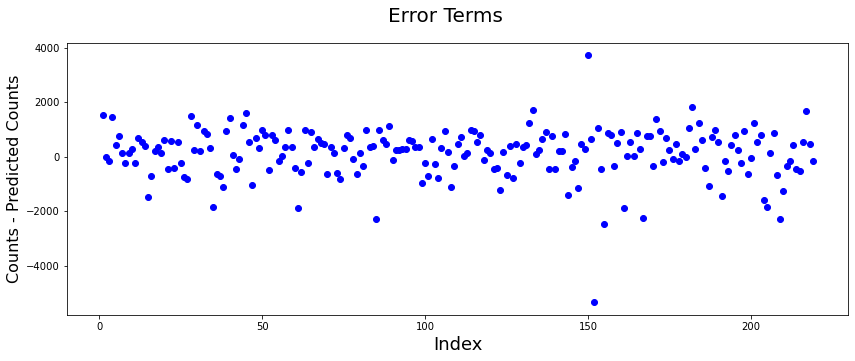

In [73]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

The error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

## 6.Making Predictions

In [74]:
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## 6.1 Intrepretting the Model

Let us go with interpretting the RFE with Manual model results as we give more importance to imputation

In [75]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'temp', 'season_spring',
       'season_winter', 'mnth_jul', 'mnth_sept',
       'weathersit_good']
lm = build_statsmodel(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     281.0
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          2.66e-169
Time:                        19:36:47   Log-Likelihood:                -4186.1
No. Observations:                 511   AIC:                             8388.
Df Residuals:                     503   BIC:                             8422.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             875.7366    213.459     

## Interepretation of results
### Analysing the above model, the comapany should focus on the following features:
- Company should mainly focus on expanding business during Spring Season.
- Company should focus on expanding business during September(advertise more in september).
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal.
- There would be less/no bookings during Light Snow or Rain, they could probably use this time to service the bikes without having business impact.

Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

## conclusion 
Significant variables to predict the demand for shared bikes

- holiday
- temp
- hum
- windspeed
- Sunday
- weathersit( Light Snow, Mist + Cloudy)
- Season
- Year (2019)
- months(January, July, September, November, December)